# ParagonCorp Products Sales Quantities Forecasting

The objective of this topic is to develop a reliable and accurate forecasting model for predicting products sales quantities, which involves utilizing historical sales data to identify patterns and trends that can inform future sales predictions. By achieving this objective, businesses can effectively plan and adjust their inventory, staffing, and production levels to meet consumer demand while minimizing wastage and maximizing profits.

# 1 - Introduction

My name is **Ahmad Luay Adnani**. As a highly enthusiastic and goal-oriented Data Scientist with a background in Civil Engineering, I bring a unique combination of technical expertise and analytical skills to the table. My education at the Institut Teknologi Sepuluh Nopember, passion for utilizing data to drive solutions, and commitment to continuous learning and growth have honed my strong organizational abilities, teamwork orientation, and exceptional problem-solving skills. With a data-driven approach and a determined mindset, I am eager to leverage my analytical mindset and technical knowledge to make a significant impact as a Data Analyst/Data Scientist. I am confident in my ability to excel in this field and tackle any challenges that arise while remaining focused on achieving my goals.

# 2 - External Link

Model Deployment: [HuggingFace](https://huggingface.co/spaces/ahmadluay/paragoncorp_products_sales_quantities_forecasting)

# 3 - Working Area

Working Area contains the process of importing libraries, Data Loading, Exploratory Data Analysis, Data Preprocessing, Model Definition, Model Training, Model Evaluation, and Model Saving & Model Inference.

## 3.1 Import Libraries

This section explains how to import the libraries that will be used in this notebook.

In [35]:
import numpy as np
import pandas as pd

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Model Time Series Library
from datetime import datetime 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Feature Scalling
from sklearn.preprocessing import MinMaxScaler

# Model Definition
from sklearn.linear_model import LinearRegression

# Model Evaluation Library
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Model saving
import pickle

## 3.2 Data Loading

This section explains the process of data loading. Dataset provided by ParagonCorp.

In [36]:
# data loading
df = pd.read_csv('sample_dataset_timeseries_noarea.csv')

# Displaying the top 10 rows of the dataset
df.head(10)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
5,2021-52,2021-12-27,2022-01-02,01fa9977e1c61ce5542c6f0c2a1b2895,2
6,2021-52,2021-12-27,2022-01-02,043e6d02d98b44c40645c8a22812fe88,44
7,2021-52,2021-12-27,2022-01-02,0512efdcc99fa4d57c42cd2cf6c73633,165
8,2021-52,2021-12-27,2022-01-02,05262da388ab82c51c48c9535bc8b121,41
9,2021-52,2021-12-27,2022-01-02,058cc2cecb91d10e901a597e67532619,383


In [37]:
# Displaying the bottom 10 rows of the dataset
df.tail(10)

,week_number,week_start_date,week_end_date,product_item,quantity
102723,2023-14,2023-04-03,2023-04-09,fe88080dd6a4387f1035c908d3ec26a5,4131
102724,2023-14,2023-04-03,2023-04-09,fe92a95f45cfe213258cd8da682cd1a3,9
102725,2023-14,2023-04-03,2023-04-09,fed98e52dd33638523d6028c19c3a103,21872
102726,2023-14,2023-04-03,2023-04-09,fef44d74d0c1e1d0d9f1c584391eeb60,75
102727,2023-14,2023-04-03,2023-04-09,ff24eb021c575c9a1dc709c3f8d6631a,436
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


Following are the variables and definitions of each column in the dataset.

| Column | Description |
| --- | --- |
| `week_number` | contained information about week of specific product sold, (2021-52 to 2023-14) |
| `week_start_date` | contained information about week start date of specific product sold |
| `week_end_date` | contained information about week end date of specific product sold |
| `product_item` | contained information about product item/product code |
| `quantity` | contained information about quantity of product in respective week |

### Dataset Size

This section explains how to check the size of the dataset.

In [38]:
# size of dataset
df.shape

(102733, 5)

### Information

This section explains the information contained in the dataset, including the index, columns, data type, non-null values, and memory usage.

In [39]:
# showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Based on information above :
- 102733 data
- There are 2 missing values in `product_item` column
- `week_number` , `week_start_date`, `week_end_date` and `product_item` are categorical columns. `quantity` is numerical column.

### Checking for Duplicated Data

This section explains the process to check for duplicated data in the dataset.

In [40]:
# Check for duplicated entries
df.duplicated().value_counts()

False    102733
dtype: int64

There is no duplicated data in this dataset.

## 3.3 Exploratory Data Analysis (EDA)

### Statistical Descriptive

In [41]:
# measure of central tendency
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,102733.0,3191.562419,12074.631014,0.0,75.0,414.0,1890.0,774732.0


Based on information above :
- The average product sales quantities is 3191.56.
- The range of product sales quantities is between  0 to 774,732

### Trend of Product Sales Quantities

In [42]:
# create a copy of the dataset
df_eda = df.copy()

# groupby week_end_date
df_eda = df_eda.groupby("week_end_date")["quantity"].sum().to_frame().reset_index()

# Set the date as index
df_eda = df.set_index('week_end_date')

# convert index to datetime
df_eda.index = pd.to_datetime(df_eda.index)

# drop columns
df_eda.drop(columns=['week_number','week_start_date','product_item'],inplace=True)

# convert index to datetime
df_eda.index = pd.to_datetime(df_eda.index)

# Select the proper time period for weekly aggregation
df_eda = df_eda['2022-01-02':'2023-04-09'].resample('W').sum()
df_eda.head()


,quantity
week_end_date,
2022-01-02,128808
2022-01-09,3839557
2022-01-16,4138934
2022-01-23,4149077
2022-01-30,4824273


In [43]:
# size of dataset
df_eda.shape

(67, 1)

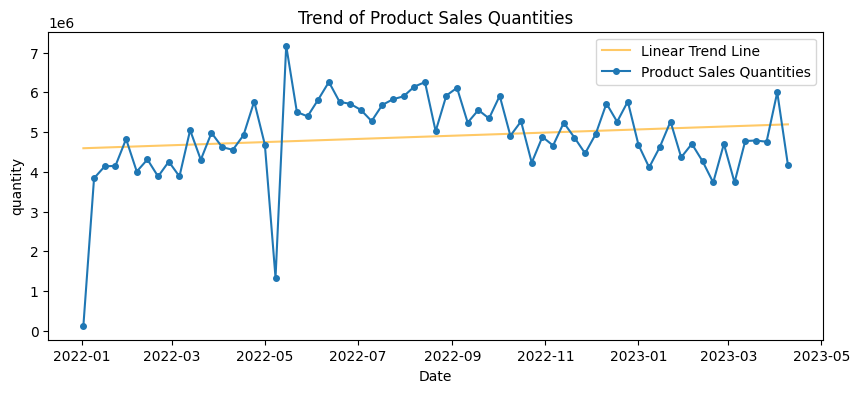

In [66]:
# Trend
# add linear line
m, b = np.polyfit(range(len(df_eda)), df_eda['quantity'], 1)
plt.figure(figsize=(10,4))
plt.plot(df_eda.index, m*range(len(df_eda)) + b, label='Linear Trend Line',color='orange', alpha=0.6)

# plot time series df_eda
plt.plot(df_eda.index, df_eda['quantity'], marker = 'o', ms = 4, label='Product Sales Quantities')

# add labels and legend
plt.title('Trend of Product Sales Quantities')
plt.xlabel('Date')
plt.ylabel('quantity')
plt.legend()

# show plot
plt.show()

In [45]:
df_eda.loc['2022-05']

,quantity
week_end_date,
2022-05-01,4684319
2022-05-08,1334134
2022-05-15,7172144
2022-05-22,5505616
2022-05-29,5394786


Here we can see the data of product sales quantities for the past 67 weeks. The trend is increasing over the past 67 weeks. There are no pattern on the products sales quantities. There are big spike that occur on 2022-05-08. 

## 3.4 SARIMA

**SARIMA** is one of the forecasting models that will be used for predicting product sales quantities. The other model is the **Linear Regression** model. The reasons for choosing SARIMA will be explained in the model definition section.

### Data Preprocessing

This section explains the process of preparing data for the model training process, such as checking stationarity, identifying autocorrelation, model definition, model training and model evaluation.

#### Stationarity

Next, we need to check whether the dataset is stationary or not. A dataset is stationary if its statistical properties like mean, variance, and autocorrelation do not change over time. A dataset is stationary if its statistical properties like mean, variance, and autocorrelation do not change over time.

Most time series datasets related to business activity are not stationary since there are usually all sorts of non-stationary elements like trends and economic cycles. But, since most time series forecasting models use stationarity—and mathematical transformations related to it—to make predictions, we need to ‘stationarize’ the time series as part of the process of fitting a model.

In [46]:
# dataset
df_eda

,quantity
week_end_date,
2022-01-02,128808
2022-01-09,3839557
2022-01-16,4138934
2022-01-23,4149077
2022-01-30,4824273
...,...
2023-03-12,4775638
2023-03-19,4787111
2023-03-26,4757590


In [47]:
# statistical descriptive
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,67.0,4.893713e+06,1.044439e+06,128808.0,4337715.5,4907074.0,5619344.0,7172144.0


ADF Statistic: -7.676589
p-value: 0.000000
Critical Values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Stationary


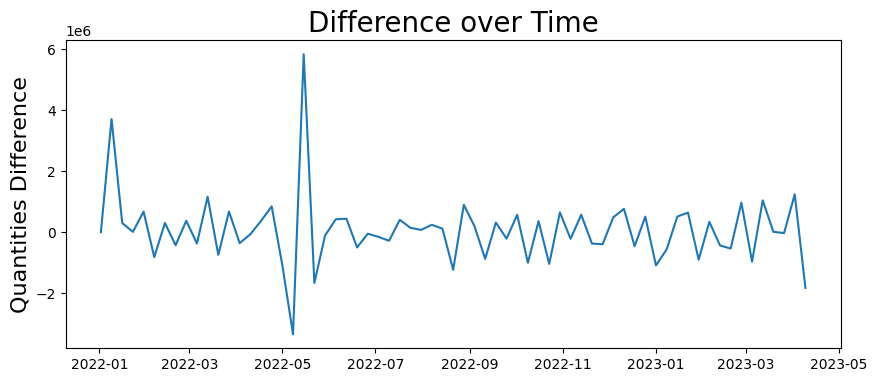

In [48]:
# differencing product sales quantity
fd = df_eda.diff().fillna(0)

# checking stationarity using adfuller
result = adfuller(fd)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('\x1b[31mNon-stationary\x1b[0m')
else:
    print('\u001b[32mStationary\u001b[0m')

# plotting the stationarity of the data
plt.figure(figsize=(10,4))
plt.plot(fd)
plt.title('Difference over Time', fontsize=20)
plt.ylabel('Quantities Difference', fontsize=16)
plt.show()

Here, we can see the products sales quantities become stationary after 1 differencing. We can also see that the stationary data visualization above. The visualization makes the pattern of our data clearer.

#### Identifying Autocorrelation

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are tools used in time series analysis to understand the autocorrelation of a time series. Autocorrelation refers to the correlation of a variable with itself over time, i.e., the correlation between a value and the lagged version of itself.

The ACF plot shows the correlation of a time series with its lagged values. Specifically, it shows the correlation coefficient between the values of the time series at lag k and the values at lag 0. A high correlation coefficient at a particular lag suggests that the values at that lag are related to the current value.

The PACF plot, on the other hand, shows the correlation between the time series and its lagged values while controlling for the values at other lags. In other words, it shows the correlation coefficient between the values of the time series at lag k and the values at lag 0, with the effect of lags 1 to k-1 removed.

Both the ACF and PACF plots can be used to identify the order of autoregressive (AR) and moving average (MA) processes, which are common models used in time series analysis.

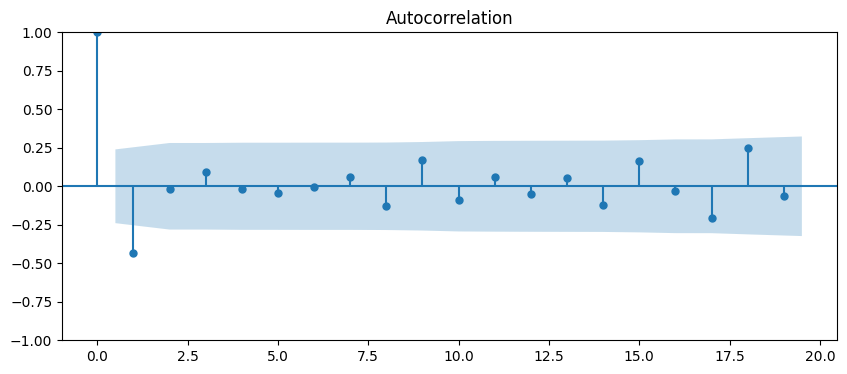

In [49]:
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(fd,ax=ax)

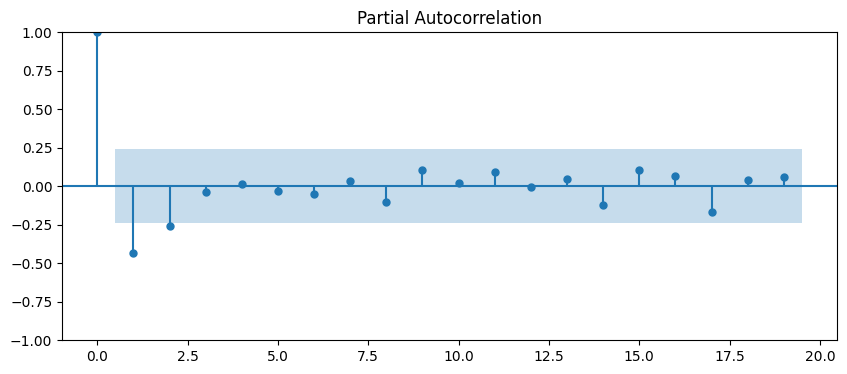

In [50]:
fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(fd,ax=ax,method='ywm')

Baseon on the visualization above :
- Auto Regressive : 2
- Differencing : 1
- Moving Average : 1


### Model Definition

After we get all the information needed and processing the data for creating the forecasting model, we can start creating the forecasting model. For the first model, we will create the forecasting model using **SARIMA (Seasonal AutoRegressive Integrated Moving Average)**. The reason for choosing this model is because most of our data have seasonal pattern (weekly).

After creating the model, we will also evaluate the model using **MAPE (Mean Absolute Percentage Error)** and **MAE (Mean Absolute Error)**. The reason for using MAPE is because the error will be at a percentage unit, which means it will represent any values regarding the size of the values (whether it is in hundreds or thousands, MAPE will represent all of them). MAE is for supporting the MAPE to see the average error but the units of the error values will have to be compared to the units of the data used.

### Model Training

Now, we want to create a forecasting model for predicting product sales quantities for the next 5 weeks. First, we create a copy of our data just to be safe. And then, splits the "data" into training and testing sets, with the first 54 data points being used for training and the remaining 13 data points being used for testing. The variable "frequency" is set to 7, indicating that the time series data has a weekly frequency.

Next, we create a SARIMAX model and fits it to the training data. The order of the SARIMAX model is set to (0, 1, 1), while the seasonal order is set to (0, 1, 1, frequency). After trial and error, this order has the lowest MAE and MAPE values, and the prediction results from the model tend to go up. The model is then used to generate predictions for the test data set and the next 5 weeks.

After we create the model, we calculate the model performance using the mean absolute percentage error (MAPE) and the mean absolute error (MAE).

Finally, we create plots the original time series data and the predicted values. The original data is shown in blue, while the predicted values are shown in orange. The x-axis shows the date and the y-axis shows the value of the products sales quantities.

MAPE : 0.11599610668348198
MAE : 594197.5324072028


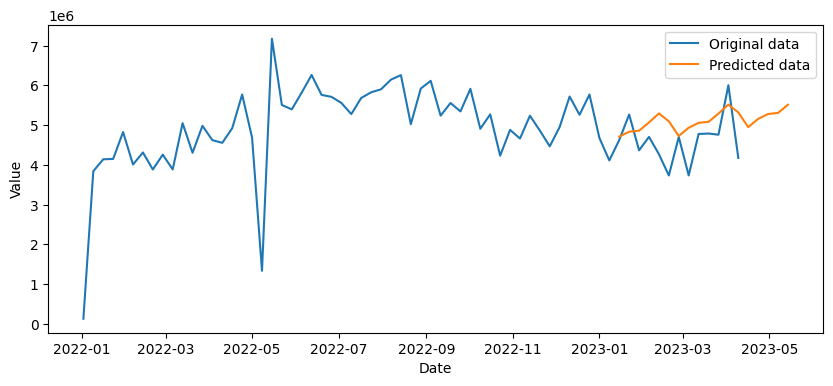

In [64]:
# Copy df to data
data = df_eda.copy()

# Set the frequency_a1 of the data (assuming daily data)
frequency = 7

# Split the data into train and test sets
train = data['quantity'].iloc[:54]
test = data['quantity'].iloc[54:]

# Create and fit the SARIMAX model
model_sarimax = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 1, 1, frequency))
model_sarimax = model_sarimax.fit()

# Generate predictions for the test set (prediction for 5 weeks)
predictions = model_sarimax.forecast(steps=len(test)+5)

# Evaluate the model performance (MAPE & MAE)
mape = mean_absolute_percentage_error(predictions[:13],test)
mae = mean_absolute_error(predictions[:13],test)
print(f'MAPE : {mape}')
print(f'MAE : {mae}')

# Plot the original data and the predicted values
plt.figure(figsize=(10,4))
plt.plot(data.index, data['quantity'], label='Original data')
plt.plot(predictions.index, predictions, label='Predicted data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### Model Evaluation

The model was successful in creating a forecast for products sales quantities based on the graph. The model's performance was evaluated using MAPE and MAE values.

The value of MAPE for this model is 11.6%, and the value of MAE is 594,197. Despite this, **the error is considered small because the range of product sales quantities is from 128,808 to 7,172,144**.

In [52]:
# showing prediction result
pred = predictions.tail(5)
pred

2023-04-16    4.948910e+06
2023-04-23    5.155758e+06
2023-04-30    5.278880e+06
2023-05-07    5.304667e+06
2023-05-14    5.511707e+06
Freq: W-SUN, Name: predicted_mean, dtype: float64

## 3.5 Linear Regression

For the second model, we will create the forecasting model using **Linear Regression**. The reason for choosing this model is because linear regression is commonly used in forecasting and financial analysis.

After creating the model, we will also evaluate the model using **MAPE (Mean Absolute Percentage Error)** and **MAE (Mean Absolute Error)**. 

### Data Preprocessing

This section explains the process of preparing data for the model training process, such as checking stationarity, identifying autocorrelation, model definition, model training and model evaluation.

#### Preparing Dataset

In this section, the dataset will be prepared before carrying out data splitting.

In [53]:
# Preparing the dataset
df_lr = df.copy()
df_lr = df_lr.groupby("week_end_date")["quantity"].sum().to_frame().reset_index()
df_lr = df_lr.set_index('week_end_date')['quantity']
df_lr.index = pd.to_datetime(df_lr.index)
df_lr

week_end_date
2022-01-02     128808
2022-01-09    3839557
2022-01-16    4138934
2022-01-23    4149077
2022-01-30    4824273
               ...   
2023-03-12    4775638
2023-03-19    4787111
2023-03-26    4757590
2023-04-02    6001166
2023-04-09    4172070
Name: quantity, Length: 67, dtype: int64

In [54]:
# Create a new dataset with 'window = 2'
window = 2 # per 2 weeks
X = []
y = []
for i in range(window,len(df_lr)):
  if window+i<len(df_lr):
    X.append(df_lr[i:window+i].values.tolist())
    try:
      y.append(df_lr[window+i])
    except:
      pass
  else:
    break

X = np.array(X)
y = np.array(y)

print('Maximum value of X =',X.max())
print('Minimum value of X =',X.min())

Maximum value of X = 7172144
Minimum value of X = 1334134


#### Data Splitting

This section explains how to separate dataset into training set and testing set.

In [55]:
# Split data to train and test

train_size = round(len(X)*0.8)
X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

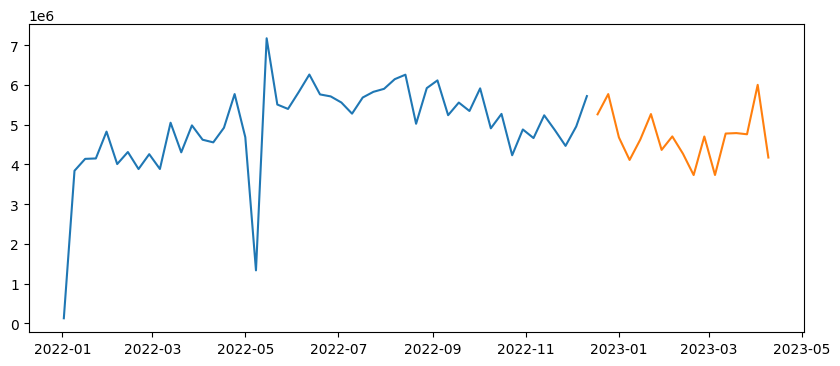

In [67]:
# visualization of train set and test set

train_2 = df_lr[:train_size]
test_2 = df_lr[train_size:]

plt.figure(figsize=(10,4))
plt.plot(train_2.index,train_2)
plt.plot(test_2.index,test_2)

#### Feature Scalling

This section explains the process of feature scalling with `MinMaxScaller`.

In [57]:
# Feature Scalling

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Model Evaluation

In this section, the training model is carried out using a linear regression algorithm. The results of the model that has been trained are then evaluated using the MAE and MAPE metrics.

The value of MAPE for this model is 12.44%, and the value of MAE is 540,970. Despite this, **the error is considered small because the range of product sales quantities is from 1,334,134 to 7,172,144**.

In [58]:
# Model Training

model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train_scaled,y_train)

y_pred_train = model_lr.predict(X_train_scaled)
y_pred_test = model_lr.predict(X_test_scaled)

print('Test MAE:',mean_absolute_error(y_test,y_pred_test))
print('Test MAPE:',mean_absolute_percentage_error(y_test,y_pred_test))

Test MAE: 540970.2646523879
Test MAPE: 0.12447229829734728


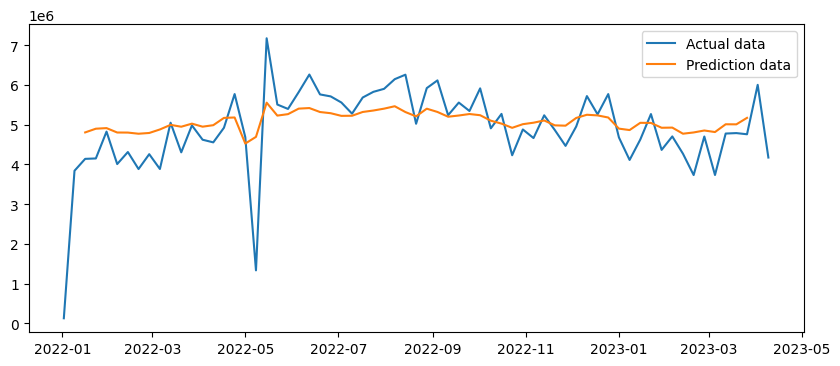

In [68]:
# Actual vs Prediction

plt.figure(figsize=(10,4))
plt.plot(df_lr.index,df_lr, label='Actual data')
plt.plot(df_lr.index[window:-window],np.append(y_pred_train,y_pred_test), label='Prediction data')
plt.legend()

In [60]:
# creating forecast function

def forecasting(weeks):
  quantity_forecast = df_lr.copy()
  window=2
  for i in range(weeks):
    X = quantity_forecast[-window:].values.reshape(1,-1)
    X_scaled = scaler.transform(X)
    new_idx = (quantity_forecast.index[-1]+pd.DateOffset(7))
    quantity_forecast[new_idx] = round(model_lr.predict(X_scaled)[0])

  return quantity_forecast

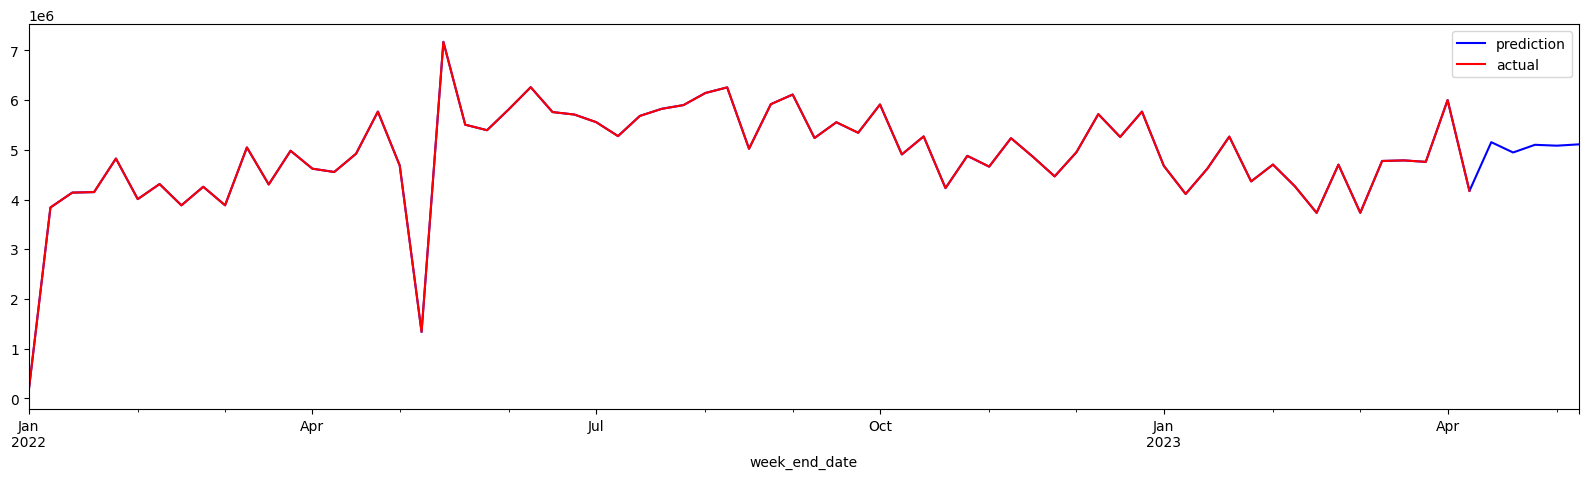

In [69]:
quantity_forecast = forecasting(5)
quantity_forecast.plot(color='blue',label='prediction',figsize=(20,5))
df_lr.plot(color='red',label='actual')
plt.legend()

## 3.6 Selected Model

The selected model is the model that has the smallest MAPE value. SARIMA has the MAPE value of **11.6 %** meanwhile Linear Regression has the MAPE value of **12.44 %**. We choose the SARIMA model to predict the product sales quantities.

## 3.7 Model Saving

This section explains the process of saving model.

In [62]:
# Saving Model
with open('model_sarimax.pkl', 'wb') as file_1:
  pickle.dump(model_sarimax, file_1)

## 3.8 Model Inference

- [Inference Notebook](https://github.com/ahmadluay9/paragoncorp_products_sales_quantities_forecasting/blob/main/inference_paragorncorp_Ahmad_Luay_Adnani.ipynb)

# 4 Conclusion

This section contains the conclusions of the analysis that has been carried out.

1. Based on Exploratory Data Analysis:
    - The average product sales quantities is 3191.56 The range of product sales quantities is between  0 to 774,732.

2. Based on Model Evaluation:
    - SARIMA model: The value of MAPE for this model is 11.6%, and the value of MAE is 594,197. Despite this, the error is considered small because the range of product sales quantities is from 128,808 to 7,172,144.
    - Linear Regression model: The value of MAPE for this model is 12.44%, and the value of MAE is 540,970. Despite this, the error is considered small because the range of product sales quantities is from 1,334,134 to 7,172,144.
    - The selected model is the model that has the smallest MAPE value which is SARIMA.

3. Business Insight:
    - Forecasting product sales quantity can provide valuable insights that can help businesses make more informed decisions and drive growth. By leveraging historical sales data and using advanced forecasting techniques, businesses can gain a deeper understanding of customer demand and optimize their operations accordingly.

4. Further Improvement:
    - To further improve the models, we can explore other algorithms.